# Importing packages

## Setup

In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import open3d
import pptk
from logging import raiseExceptions
import seaborn as sns
import funcs
import tensorflow as tf

%reload_ext funcs


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


2022-07-14 12:29:26.581462: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Data loader

original dataframe size (1066, 18)
 dataframe (688, 4)


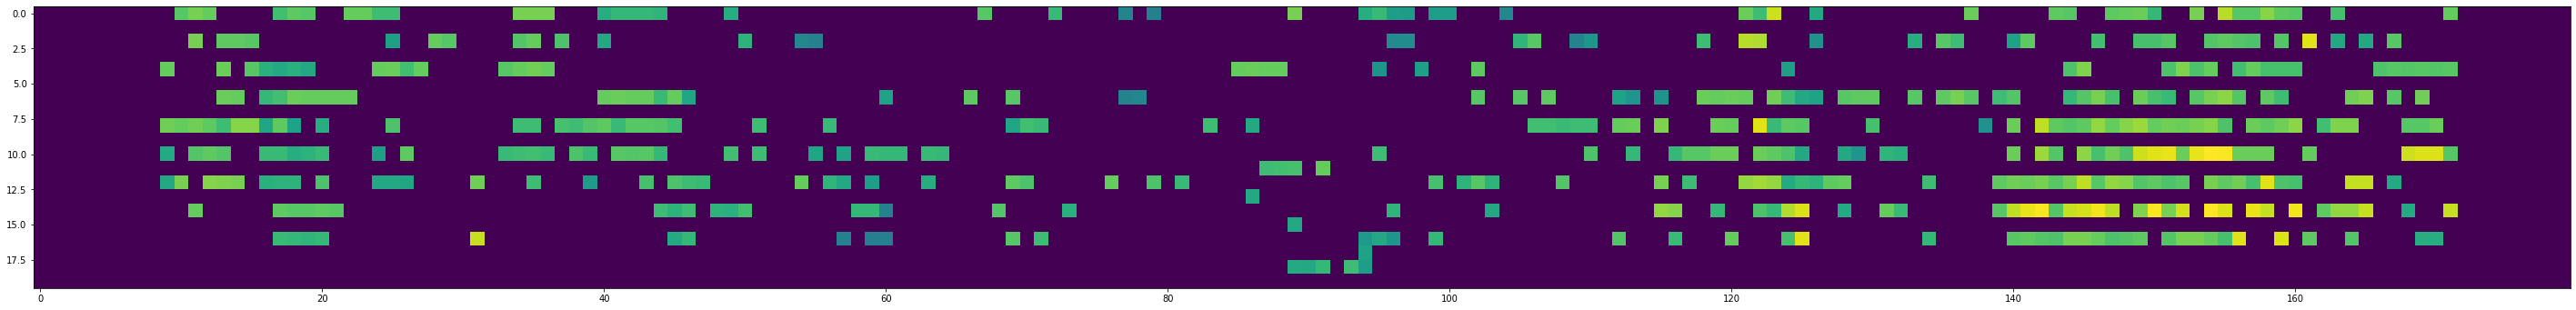

In [2]:
dataloader = funcs.DataLoader(modality='Radar' , data_type='matrix')
dataloader.get_data(filename='1_.txt')

print('original dataframe size', dataloader.dataframe_original.shape)
print(' dataframe',  dataloader.dataframe.shape )

plt.figure(figsize=(50,10))
plt.imshow(dataloader.data_matrix[:,:,0] / dataloader.data_matrix[:,:,0].max() )

In [3]:
x,y,z = dataloader.spherical_to_cartesian( Azimuth_Angle=dataloader.dataframe.Azimuth , Elevation_Angle=dataloader.dataframe.Elevation - 10 , Range=dataloader.dataframe.Range )

# plt.hist(z)

dataloader.dataframe

,Range,Azimuth,Elevation,RCS
0,1,31,16,85
1,1,54,2,43
2,1,55,2,41
3,1,56,8,40
6,1,57,16,41
...,...,...,...,...
1059,485,40,2,56
1060,496,44,0,61
1061,497,47,12,63
1063,499,46,16,62


In [4]:
# dataloader.dataframe_original

## <span style="color:orange; font-size:0.8em"> Viewing the point clouds </span>

In [16]:
columns = dataloader.dataframe.columns[:3]

funcs.DataLoader().visualize(points=dataloader.dataframe[columns])

## <span style="color:orange; font-size:0.8em"> Vector Input </span>

In [6]:
# loader = funcs.VectorInput(filename='1_.txt', modality='Radar')

# print(loader.dataframe.shape)
# print(loader.data.test.shape)

## <span style="color:orange; font-size:0.8em"> Matrix Input </span>

In [7]:
loader = funcs.MatrixInput(modality='Radar')

Loading the dataset: 1000it [00:30, 32.65it/s]
2022-07-14 12:29:58.805679: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-14 12:29:58.810517: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-07-14 12:29:58.810530: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-07-14 12:29:58.810769: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized 

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 0.2530 - val_loss: 0.2767
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 0.1552 - val_loss: 0.1842
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 0.1479 - val_loss: 0.1584
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 0.1420 - val_loss: 0.1448
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 0.1344 - val_loss: 0.1338
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 0.1264 - val_loss: 0.1247
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 0.1210 - val_loss: 0.1196
Epoch 8/20
63/63 [==============================] - 1s 18ms/step - loss: 0.1176 - val_loss: 0.1169
Epoch 9/20
63/63 [==============================] - 1s 19ms/step - loss: 0.1153 - val_loss: 0.1147
Epoch 10/20
63/63 [==============================] - 1s 18ms/step - loss: 0.1135 - val_loss: 0.1130
Epoch 11/

(<AxesSubplot:title={'center':'input'}>,
 Text(0.5, 1.0, 'input'))

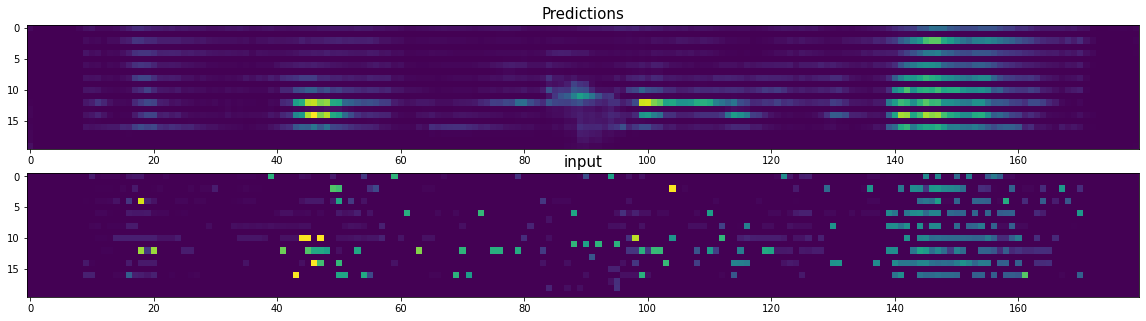

In [17]:
channel = 1
plt.figure(figsize=(20,5))

plt.subplot(211), plt.imshow(loader.predictions[0,:,:,channel]), plt.title("Predictions", fontsize=15)
plt.subplot(212), plt.imshow(loader.dataset[0,:,:,channel]), plt.title("input", fontsize=15)

In [9]:
loader.dataset[0,:,:,0].max()

0.96875

In [10]:
# Take one sample
sample = loader.dataset[0,...]

# Find the non-zero coordinates in Range channel
non_zero_coordinates = np.nonzero(sample[:,:,1])

# get the values at the non zero coordinates
RCS      = sample[:,:,0][non_zero_coordinates]
Range    = sample[:,:,1][non_zero_coordinates]
invRange = sample[:,:,2][non_zero_coordinates]

dataframe = pd.DataFrame( non_zero_coordinates + (RCS, Range, invRange)  , index=['Elevation','Azimuth','RCS','Range', 'invRange']).T

dataframe

,Elevation,Azimuth,RCS,Range,invRange
0,0.0,10.0,0.625000,0.072407,0.027027
1,0.0,11.0,0.791667,0.009785,0.200000
2,0.0,12.0,0.729167,0.011742,0.166667
3,0.0,13.0,0.729167,0.011742,0.166667
4,0.0,14.0,0.729167,0.011742,0.166667
...,...,...,...,...,...
557,17.0,95.0,0.562500,0.131115,0.014925
558,18.0,84.0,0.562500,0.097847,0.020000
559,18.0,87.0,0.552083,0.037182,0.052632
560,18.0,89.0,0.572917,0.037182,0.052632
